In [1]:
"Importing Libraries"
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D , Convolution2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
from sklearn import metrics
from io import BytesIO 
import seaborn as sns; sns.set()
import tensorflow
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import cohen_kappa_score , matthews_corrcoef , classification_report , roc_auc_score , accuracy_score
from sklearn.ensemble import RandomForestClassifier
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [ ]:
"Loading the dataset from directory"
directory_1 = r"C:\Users\Abinaya Ravichandran\Desktop\Fall 2020\ECE613\Research Project\Detecting_Covid19_CT_Scan\COVID"
directory_2 = r"C:\Users\Abinaya Ravichandran\Desktop\Fall 2020\ECE613\Research Project\Detecting_Covid19_CT_Scan\NORMAL"

In [11]:
"Initializing variables"
x1=[]
x_ = list()
Y = []
y = list()
c = 0
nc = 0

In [ ]:
"COVID Dataset"
for filename in os.listdir(directory_1):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        try:
            path = os.path.join(directory_1, filename)
            img = cv2.imread(path)
            img_ = cv2.resize(img,(224,224))
            img_arr = np.asarray(img_)
            x_.append(img_arr)
            label = 0
            c = c+1
        except:
            None

In [ ]:
"NORMAL Dataset"
for filename in os.listdir(directory_2):
    if filename.endswith(".png") or filename.endswith(".jpg"):
#       print(os.path.join(directory, filename))
        try:
            path = os.path.join(directory_2, filename)
            img = cv2.imread(path)
            img_ = cv2.resize(img,(224,224))
            img_arr = np.asarray(img_)
            x_.append(img_arr)
            label = 1
            nc = nc+1
        except:
            None

In [2]:
"Assinging lable to image datframe"
for item in x_:
    if len(item.shape) > 2 and item.shape[2] == 4:
        item = cv2.cvtColor(item, cv2.COLOR_BGRA2BGR)
    x1.append(item)
    
"Covid Images"
for i in range(350):
    Y.append(1)
# print(Y)

"Normal Images"
for i in range(350):
    Y.append(0)
# print(Y)   

"Converting images to numpy array"
X = np.asarray(x1)
y = np.asarray(Y)
y = to_categorical(y,num_classes = 2)
# print(X.shape)

In [4]:
"Spliting data into Train, Test and Validation"
X_train,x_test,y_train,y_test = train_test_split(*shuffle(X, y),test_size = 0.10,random_state = 42)
X_train,x_val,y_train,y_val = train_test_split(*shuffle(X_train, y_train),test_size = 0.10,random_state = 42)

In [6]:
def print_confusion_matrix():
    matrix = confusion_matrix(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1))
    plt.figure(figsize=(6, 4))
    ax = sns.heatmap(matrix,cmap='Blues',linecolor='white',linewidths=1,annot=True,fmt='d')
    ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_model_accuracy_loss():
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
    plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
    plt.plot(history.history['loss'], 'r--', label='Loss of training data')
    plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
    plt.title('Model Accuracy and Loss')
    plt.ylabel('Accuracy and Loss')
    plt.xlabel('Training Epoch')
    plt.ylim(0)
    plt.legend()
    plt.show()

def print_performance_metrics():
    print('Accuracy:', np.round(metrics.accuracy_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1)),4))
    print('Precision:', np.round(metrics.precision_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1),average='weighted'),4))
    print('Recall:', np.round(metrics.recall_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1),average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1),average='weighted'),4))
    print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1)),4))
    print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1)),4))
    print('ROC AUC:',np.round(roc_auc_score(y_test.argmax(axis=1),max_y_pred_test.argmax(axis=1)),4)) 
    print('\t\tClassification Report:\n', metrics.classification_report(y_test.argmax(axis=1), max_y_pred_test.argmax(axis=1)))

### VGG19 with 1 CNN layer

In [7]:
baseModel = VGG19(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
headModel = baseModel.output

#Layer 1
headModel = Sequential()(headModel)
headModel = Convolution2D(128, (3, 3),input_shape=(224,224,3))(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
headModel = BatchNormalization()(headModel)


# Flattenning
headModel = Flatten(name="flatten")(headModel)

headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(8, activation="relu")(headModel)
predictions = Dense(2, activation='sigmoid')(headModel)

from keras.models import Model
model1 = Model(inputs=baseModel.input, outputs=predictions)


for layer in baseModel.layers:
    layer.trainable = False
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model1.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

history= model1.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy']))

Train on 481 samples, validate on 54 samples
Epoch 1/20
481/481 [==============================] - 59s 123ms/step - loss: 0.6483 - accuracy: 0.5811 - val_loss: 0.8922 - val_accuracy: 0.5556
Epoch 2/20
481/481 [==============================] - 63s 130ms/step - loss: 0.4361 - accuracy: 0.6892 - val_loss: 0.6896 - val_accuracy: 0.5185
Epoch 3/20
481/481 [==============================] - 63s 131ms/step - loss: 0.3710 - accuracy: 0.7287 - val_loss: 0.4678 - val_accuracy: 0.6574
Epoch 4/20
481/481 [==============================] - 63s 131ms/step - loss: 0.2781 - accuracy: 0.8358 - val_loss: 0.4346 - val_accuracy: 0.7963
Epoch 5/20
481/481 [==============================] - 63s 131ms/step - loss: 0.1297 - accuracy: 0.9730 - val_loss: 0.4354 - val_accuracy: 0.8333
Epoch 6/20
481/481 [==============================] - 63s 131ms/step - loss: 0.0699 - accuracy: 0.9802 - val_loss: 0.6220 - val_accuracy: 0.7593
Epoch 7/20
481/481 [==============================] - 64s 133ms/step - loss: 0.0918 -

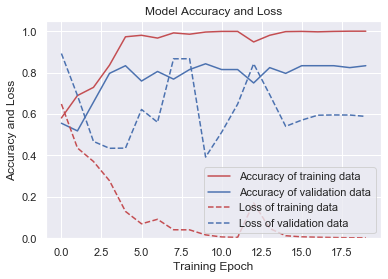

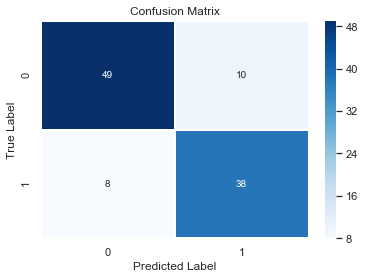

Accuracy: 0.8286
Precision: 0.8299
Recall: 0.8286
F1 Score: 0.8289
Cohen Kappa Score: 0.6535
Matthews Corrcoef: 0.654
ROC AUC: 0.8283
		Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        59
           1       0.79      0.83      0.81        46

    accuracy                           0.83       105
   macro avg       0.83      0.83      0.83       105
weighted avg       0.83      0.83      0.83       105



In [8]:
y_pred_test = model1.predict(x_test)
max_y_pred_test = np.round(y_pred_test)
plot_model_accuracy_loss()
print_confusion_matrix()
print_performance_metrics()

## VGG19 with 2 CNN Layer

In [7]:
baseModel = VGG19(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
headModel = baseModel.output

#Layer 1
headModel = Sequential()(headModel)
headModel = Convolution2D(128, (3, 3),input_shape=(224,224,3))(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
#headModel = BatchNormalization()(headModel)

# Layer 2
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
headModel = BatchNormalization()(headModel)


# Flattenning
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(8, activation="relu")(headModel)
predictions = Dense(2, activation='sigmoid')(headModel)

from keras.models import Model
model2 = Model(inputs=baseModel.input, outputs=predictions)


for layer in baseModel.layers:
    layer.trainable = False
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model2.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

history= model2.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy']))

Train on 13 samples, validate on 2 samples
Epoch 1/20
13/13 [==============================] - 2s 141ms/step - loss: 0.7481 - accuracy: 0.5769 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 2/20
13/13 [==============================] - 2s 121ms/step - loss: 0.6328 - accuracy: 0.4615 - val_loss: 0.6885 - val_accuracy: 0.7500
Epoch 3/20
13/13 [==============================] - 2s 128ms/step - loss: 0.5491 - accuracy: 0.7692 - val_loss: 0.6853 - val_accuracy: 0.5000
Epoch 4/20
13/13 [==============================] - 2s 124ms/step - loss: 0.4645 - accuracy: 0.8462 - val_loss: 0.6842 - val_accuracy: 0.5000
Epoch 5/20
13/13 [==============================] - 2s 125ms/step - loss: 0.3956 - accuracy: 0.8846 - val_loss: 0.6858 - val_accuracy: 0.5000
Epoch 6/20
13/13 [==============================] - 2s 127ms/step - loss: 0.3440 - accuracy: 1.0000 - val_loss: 0.6800 - val_accuracy: 0.5000
Epoch 7/20
13/13 [==============================] - 2s 127ms/step - loss: 0.2939 - accuracy: 1.0000 - val

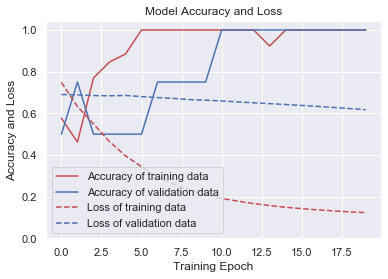

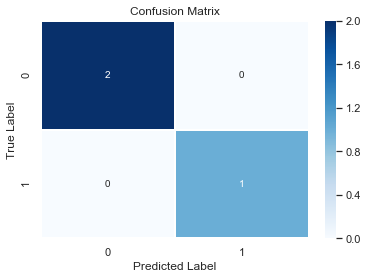

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Cohen Kappa Score: 1.0
Matthews Corrcoef: 1.0
ROC AUC: 1.0
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [9]:
y_pred_test = model2.predict(x_test)
max_y_pred_test = np.round(y_pred_test)
plot_model_accuracy_loss()
print_confusion_matrix()
print_performance_metrics()

## VGG19 with 3 CNN Layer

In [12]:
baseModel = VGG19(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
headModel = baseModel.output

#Layer 1
headModel = Sequential()(headModel)
headModel = Convolution2D(128, (3, 3),input_shape=(224,224,3))(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
#headModel = BatchNormalization()(headModel)

# Layer 2
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
#headModel = BatchNormalization()(headModel)

# Layer 3
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
headModel = BatchNormalization()(headModel)


# Flattenning
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(8, activation="relu")(headModel)
predictions = Dense(2, activation='sigmoid')(headModel)

from keras.models import Model
model3 = Model(inputs=baseModel.input, outputs=predictions)


for layer in baseModel.layers:
    layer.trainable = False
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model3.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

history = model3.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy']))

Train on 517 samples, validate on 58 samples
Epoch 1/20
517/517 [==============================] - 72s 138ms/step - loss: 0.6751 - accuracy: 0.5861 - val_loss: 0.6853 - val_accuracy: 0.5603
Epoch 2/20
517/517 [==============================] - 71s 138ms/step - loss: 0.5108 - accuracy: 0.7698 - val_loss: 0.6617 - val_accuracy: 0.6983
Epoch 3/20
517/517 [==============================] - 71s 137ms/step - loss: 0.4783 - accuracy: 0.7988 - val_loss: 0.6583 - val_accuracy: 0.6121
Epoch 4/20
517/517 [==============================] - 71s 136ms/step - loss: 0.3532 - accuracy: 0.8578 - val_loss: 0.6181 - val_accuracy: 0.6897
Epoch 5/20
517/517 [==============================] - 70s 136ms/step - loss: 0.3505 - accuracy: 0.8559 - val_loss: 0.6541 - val_accuracy: 0.6293
Epoch 6/20
517/517 [==============================] - 70s 136ms/step - loss: 0.4112 - accuracy: 0.8124 - val_loss: 0.6499 - val_accuracy: 0.5862
Epoch 7/20
517/517 [==============================] - 70s 136ms/step - loss: 0.3030 -

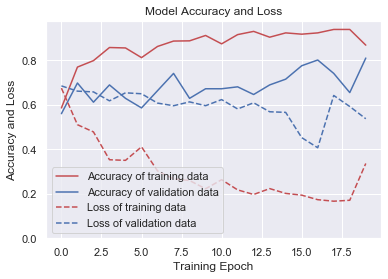

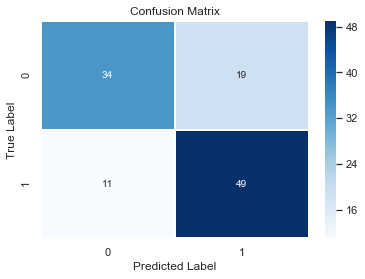

Accuracy: 0.7345
Precision: 0.737
Recall: 0.7345
F1 Score: 0.732
Cohen Kappa Score: 0.4622
Matthews Corrcoef: 0.4671
ROC AUC: 0.7291
		Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.64      0.69        53
           1       0.72      0.82      0.77        60

    accuracy                           0.73       113
   macro avg       0.74      0.73      0.73       113
weighted avg       0.74      0.73      0.73       113



In [13]:
y_pred_test = model3.predict(x_test)
max_y_pred_test = np.round(y_pred_test)
plot_model_accuracy_loss()
print_confusion_matrix()
print_performance_metrics()

## VGG19 with 4 CNN Layer

In [14]:
baseModel = VGG19(weights="imagenet", include_top=False,input_shape=(224, 224, 3))
headModel = baseModel.output

#Layer 1
headModel = Sequential()(headModel)
headModel = Convolution2D(128, (3, 3),input_shape=(224,224,3))(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
#headModel = BatchNormalization()(headModel)

# Layer 2
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('softmax')(headModel)
headModel = MaxPooling2D(pool_size = (2,2))(headModel)
#headModel = BatchNormalization()(headModel)

# Layer 3
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
#headModel = BatchNormalization()(headModel)

#Layer 4
headModel = Convolution2D(256, (3, 3) , padding ='same')(headModel)
headModel = Activation('relu')(headModel)
headModel = MaxPooling2D(pool_size = (1,1))(headModel)
#headModel = BatchNormalization()(headModel)


# Flattenning
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dense(8, activation="relu")(headModel)
predictions = Dense(2, activation='sigmoid')(headModel)

from keras.models import Model
model4 = Model(inputs=baseModel.input, outputs=predictions)


for layer in baseModel.layers:
    layer.trainable = False
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model4.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

history = model4.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.1)
print('CV accuracy:' , np.average(history.history['val_accuracy']))

Train on 517 samples, validate on 58 samples
Epoch 1/20
517/517 [==============================] - 71s 137ms/step - loss: 0.6928 - accuracy: 0.5590 - val_loss: 0.6925 - val_accuracy: 0.5517
Epoch 2/20
517/517 [==============================] - 71s 138ms/step - loss: 0.6922 - accuracy: 0.5590 - val_loss: 0.6920 - val_accuracy: 0.5517
Epoch 3/20
517/517 [==============================] - 71s 137ms/step - loss: 0.6916 - accuracy: 0.5590 - val_loss: 0.6916 - val_accuracy: 0.5517
Epoch 4/20
517/517 [==============================] - 71s 137ms/step - loss: 0.6911 - accuracy: 0.5590 - val_loss: 0.6911 - val_accuracy: 0.5517
Epoch 5/20
517/517 [==============================] - 71s 138ms/step - loss: 0.6907 - accuracy: 0.5590 - val_loss: 0.6909 - val_accuracy: 0.5517
Epoch 6/20
517/517 [==============================] - 71s 138ms/step - loss: 0.6905 - accuracy: 0.5590 - val_loss: 0.6907 - val_accuracy: 0.5517
Epoch 7/20
517/517 [==============================] - 71s 137ms/step - loss: 0.6903 -

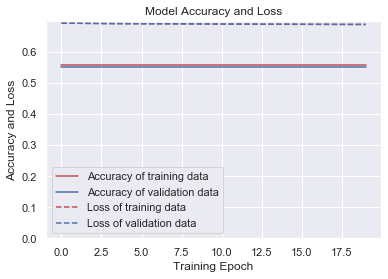

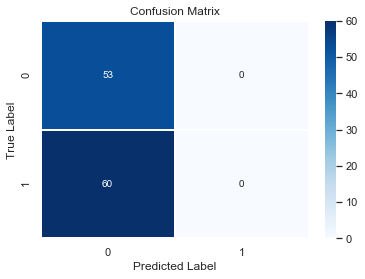

Accuracy: 0.469
Precision: 0.22
Recall: 0.469
F1 Score: 0.2995
Cohen Kappa Score: 0.0
Matthews Corrcoef: 0.0
ROC AUC: 0.5
		Classification Report:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64        53
           1       0.00      0.00      0.00        60

    accuracy                           0.47       113
   macro avg       0.23      0.50      0.32       113
weighted avg       0.22      0.47      0.30       113



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
y_pred_test = model4.predict(x_test)
max_y_pred_test = np.round(y_pred_test)
plot_model_accuracy_loss()
print_confusion_matrix()
print_performance_metrics()